In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as optim
sns.set(style="darkgrid")

In [2]:
df_age=pd.read_csv("Singapore_age.csv")

In [3]:
df_age.head()

,Year,Total Residents,0 - 4 Years,5 - 9 Years,10 - 14 Years,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,...,70 - 74 Years,75 - 79 Years,80 - 84 Years,85 - 89 Years,65 Years & Over,70 Years & Over,75 Years & Over,80 Years & Over,85 Years & Over,90 Years & Over
0,1957,"1,445,929","264,727","218,097","136,280","135,679","119,266","111,726","89,925","82,709",...,"8,774","4,225","1,786",na,"31,061","15,662","6,888","2,663",877,na
1,1958,"1,518,800","277,800","229,600","157,100","134,300","124,900","114,700","95,100","84,300",...,na,na,na,na,"33,700","16,600",na,na,na,na
2,1959,"1,587,200","288,800","241,000","175,700","131,500","133,100","115,100","102,100","85,200",...,na,na,na,na,"35,700","17,900",na,na,na,na
3,1960,"1,646,400","297,000","250,300","200,300","124,700","139,500","116,200","106,600","86,400",...,na,na,na,na,"37,500","19,100",na,na,na,na
4,1961,"1,702,400","303,700","258,900","217,400","124,900","142,500","119,600","112,300","86,200",...,na,na,na,na,"38,800","19,800",na,na,na,na


In [4]:
len(df_age)

63

In [5]:
df_age.dtypes

Year                 int64
Total Residents     object
0  -  4 Years       object
5  -  9 Years       object
10 - 14 Years       object
15 - 19 Years       object
20 - 24 Years       object
25 - 29 Years       object
30 - 34 Years       object
35 - 39 Years       object
40 - 44 Years       object
45 - 49 Years       object
50 - 54 Years       object
55 - 59 Years       object
60 - 64 Years       object
65 - 69 Years       object
70 - 74 Years       object
75 - 79 Years       object
80 - 84 Years       object
85 - 89 Years       object
65 Years & Over     object
 70 Years & Over    object
75 Years & Over     object
80 Years & Over     object
85 Years & Over     object
90 Years & Over     object
dtype: object

In [6]:
df_age['0  -  4 Years'] = df_age['0  -  4 Years'].str.replace(',', '').astype(int)
df_age['5  -  9 Years'] = df_age['5  -  9 Years'].str.replace(',', '').astype(int)
df_age['10 - 14 Years'] = df_age['10 - 14 Years'].str.replace(',', '').astype(int)
df_age['15 - 19 Years'] = df_age['15 - 19 Years'].str.replace(',', '').astype(int)
df_age['20 - 24 Years'] = df_age['20 - 24 Years'].str.replace(',', '').astype(int)
df_age['25 - 29 Years'] = df_age['25 - 29 Years'].str.replace(',', '').astype(int)
df_age['30 - 34 Years'] = df_age['30 - 34 Years'].str.replace(',', '').astype(int)
df_age['35 - 39 Years'] = df_age['35 - 39 Years'].str.replace(',', '').astype(int)
df_age['40 - 44 Years'] = df_age['40 - 44 Years'].str.replace(',', '').astype(int)
df_age['45 - 49 Years'] = df_age['45 - 49 Years'].str.replace(',', '').astype(int)
df_age['50 - 54 Years'] = df_age['50 - 54 Years'].str.replace(',', '').astype(int)
df_age['55 - 59 Years'] = df_age['55 - 59 Years'].str.replace(',', '').astype(int)
df_age['60 - 64 Years'] = df_age['60 - 64 Years'].str.replace(',', '').astype(int)
df_age['65 Years & Over'] = df_age['65 Years & Over'].str.replace(',', '').astype(int)
df_age[['Year']]=df_age[['Year']].astype(np.int32)

In [7]:
df_age.dtypes

Year                 int32
Total Residents     object
0  -  4 Years        int32
5  -  9 Years        int32
10 - 14 Years        int32
15 - 19 Years        int32
20 - 24 Years        int32
25 - 29 Years        int32
30 - 34 Years        int32
35 - 39 Years        int32
40 - 44 Years        int32
45 - 49 Years        int32
50 - 54 Years        int32
55 - 59 Years        int32
60 - 64 Years        int32
65 - 69 Years       object
70 - 74 Years       object
75 - 79 Years       object
80 - 84 Years       object
85 - 89 Years       object
65 Years & Over      int32
 70 Years & Over    object
75 Years & Over     object
80 Years & Over     object
85 Years & Over     object
90 Years & Over     object
dtype: object

In [8]:
Y=df_age[['0  -  4 Years','5  -  9 Years','10 - 14 Years','15 - 19 Years','20 - 24 Years','25 - 29 Years','30 - 34 Years','35 - 39 Years','40 - 44 Years','45 - 49 Years','50 - 54 Years','55 - 59 Years','60 - 64 Years','65 Years & Over']].values
X=df_age[['Year']].values
X_train=np.zeros(57)
X_test=np.zeros(6)
X_whole=np.zeros(63)
for i in range(63):
    X_whole[i]=X[i]
    if i<57:
        X_train[i]=X[i]
    else:
        X_test[i-57]=X[i]
print(X_whole)
print(X_train)
print(X_test)

[1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968.
 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980.
 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992.
 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019.]
[1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968.
 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980.
 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992.
 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.]
[2014. 2015. 2016. 2017. 2018. 2019.]


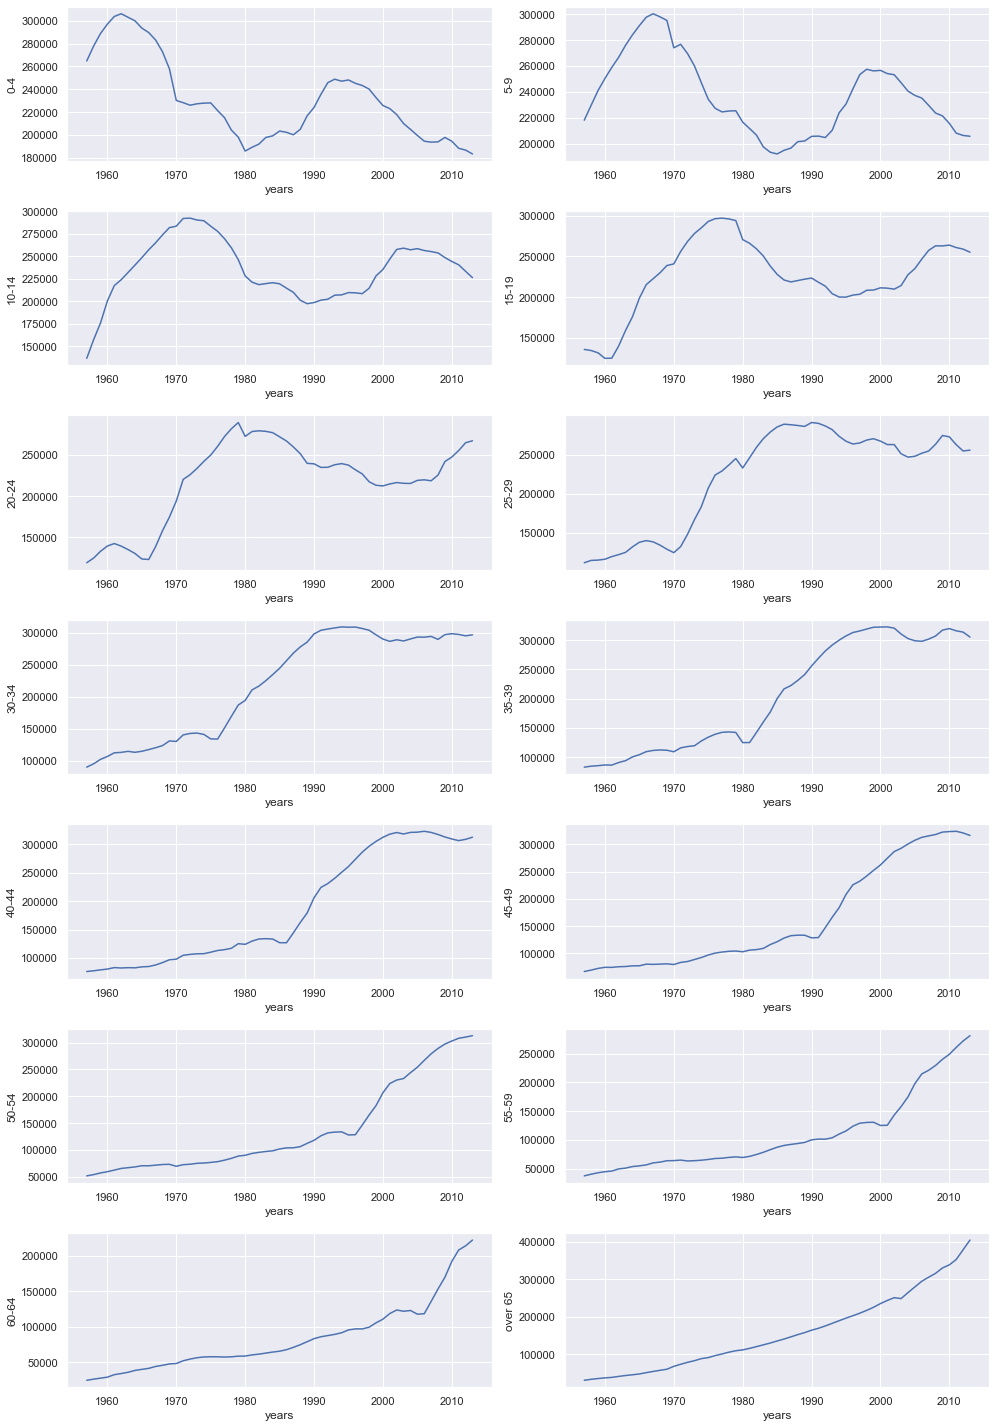

In [9]:
Y_train=np.zeros(57)
Y_test=np.zeros(6)
y_lr_age=np.zeros([14,6])
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12],[ax13,ax14]) = plt.subplots(nrows=7,ncols=2)
ax=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]
comlumns=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','over 65']
for i in range(14):
    for n in range(63):
        if n<57:
            Y_train[n]=Y[n][i]
        else:
            Y_test[n-57]=Y[n][i]
    ax[i].set_xlabel('years')
    ax[i].set_ylabel(comlumns[i])
    ax[i].plot(X_train, Y_train, 'b')
fig.set_size_inches(14, 20)
fig.tight_layout()

In [10]:
group_ridge=np.zeros([63,5])
group_logistic=np.zeros([63,9])
for i in range(14):
    if i<2:
        for n in range(63):
            group_ridge[n][i]=Y[n][i]
    elif i>1 and i<11:
        for n in range(63):
            group_logistic[n][i-2]=Y[n][i]
    elif i>10:
        for n in range(63):
            group_ridge[n][i-9]=Y[n][i]

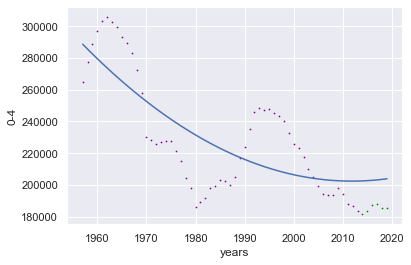

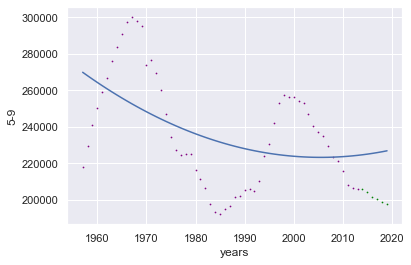

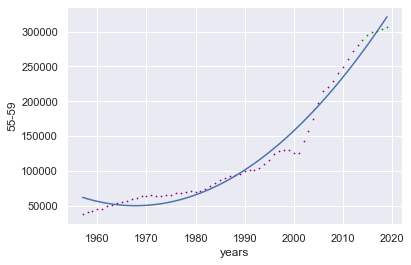

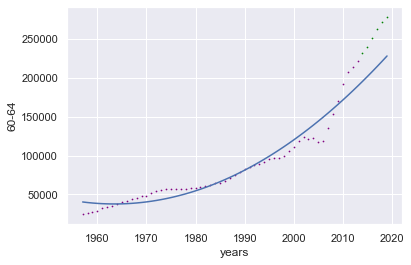

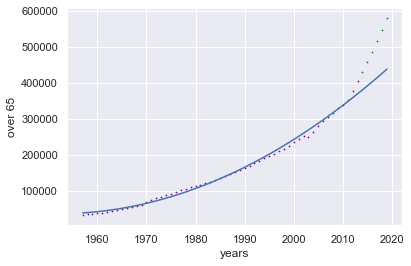

In [11]:
ridge = lm.RidgeCV()
lrp = lm.LinearRegression()
fig,ax1=plt.subplots(nrows=1,ncols=1)
fig,ax2=plt.subplots(nrows=1,ncols=1)
fig,ax3=plt.subplots(nrows=1,ncols=1)
fig,ax4=plt.subplots(nrows=1,ncols=1)
fig,ax5=plt.subplots(nrows=1,ncols=1)

ridge_ax=[ax1,ax2,ax3,ax4,ax5]
comlumns=['0-4','5-9','55-59','60-64','over 65']
results_ridge=np.zeros([63,5])
for i in range(5):
    for n in range(63):
        if n<57:
            Y_train[n]=group_ridge[n][i]
        else:
            Y_test[n-57]=group_ridge[n][i]
    if i<2:        
        ridge.fit(np.vander(X_train, 3), Y_train)
        y_ridge = ridge.predict(np.vander(X_whole, 3))
    else:
        lrp.fit(np.vander(X_train,3), Y_train)
        y_ridge = lrp.predict(np.vander(X_whole, 3))
    for n in range(63):
        results_ridge[n][i]=y_ridge[n]
    ridge_ax[i].set_xlabel('years')
    ridge_ax[i].set_ylabel(comlumns[i])
    ridge_ax[i].scatter(X_train, Y_train, color="purple", s=0.5)
    ridge_ax[i].scatter(X_test, Y_test, color="green", s=0.5)
    ridge_ax[i].plot(X_whole,y_ridge,'-')

In [12]:
def LogisticGrowth(t, a, b, c):
    return c / (1+a*np.exp(-b*t))

In [13]:
def theLogistic(a,b,c,t):
    return c / (1+a*np.exp(-b*t))

In [14]:
X_train_temp=np.zeros(57)
X_test_temp=np.zeros(6)
X_whole_temp=np.zeros(63)
for i in range(57):
    X_train_temp[i]=X_train[i]-1957
for i in range(6):
    X_test_temp[i]=X_test[i]-1957
for i in range(63):
    X_whole_temp[i]=X_whole[i]-1957

In [15]:
comlumns2=['10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
mins=[136280,124700,119266,111726,89925,82709,76217,66716,51794]
mins=np.array(mins)
results_logistic=np.zeros([63,9])
A=np.zeros(9)
B=np.zeros(9)
C=np.zeros(9)
y_logitic=np.zeros(63)

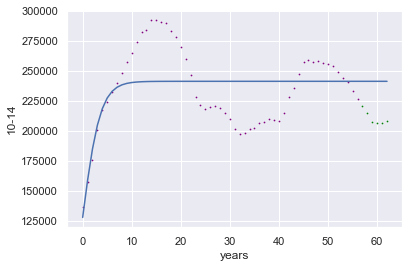

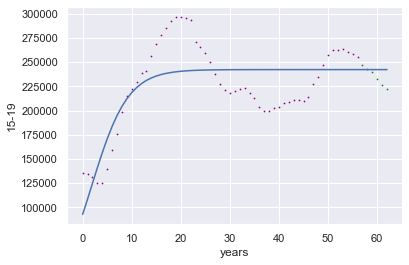

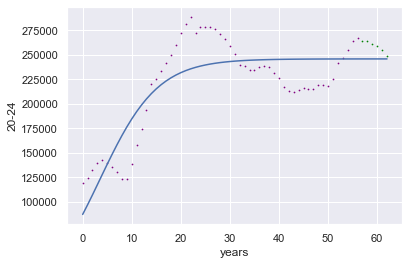

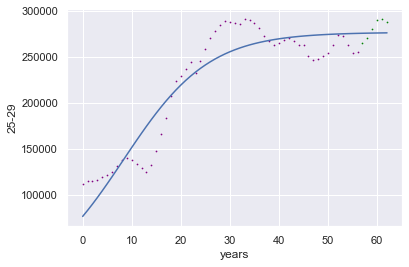

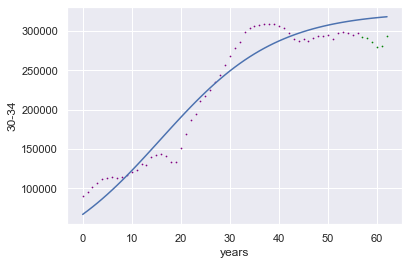

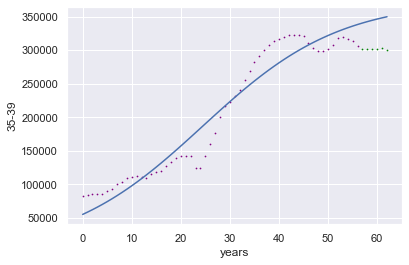

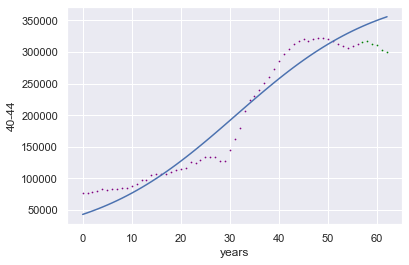

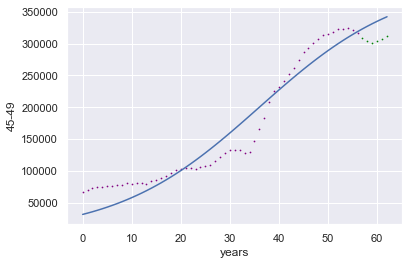

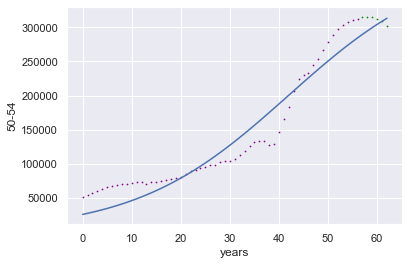

In [16]:
bnd = (0, [1000, 3, 400000])
fig,ax1=plt.subplots(nrows=1,ncols=1)
fig,ax2=plt.subplots(nrows=1,ncols=1)
fig,ax3=plt.subplots(nrows=1,ncols=1)
fig,ax4=plt.subplots(nrows=1,ncols=1)
fig,ax5=plt.subplots(nrows=1,ncols=1)
fig,ax6=plt.subplots(nrows=1,ncols=1)
fig,ax7=plt.subplots(nrows=1,ncols=1)
fig,ax8=plt.subplots(nrows=1,ncols=1)
fig,ax9=plt.subplots(nrows=1,ncols=1)
logistic_ax=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(9):
    for n in range(63):
        if n<57:
            Y_train[n]=group_logistic[n][i]
        else:
            Y_test[n-57]=group_logistic[n][i]
    
    (A[i], B[i], C[i]), cov = optim.curve_fit(LogisticGrowth, X_train_temp, Y_train, bounds=bnd)
    y_logistic=theLogistic(A[i],B[i],C[i],X_whole_temp)
    
    for n in range(63):
        results_logistic[n][i]=y_logistic[n]
    logistic_ax[i].set_xlabel('years')
    logistic_ax[i].set_ylabel(comlumns2[i])
    logistic_ax[i].scatter(X_train_temp, Y_train, color="purple", s=0.5)
    logistic_ax[i].scatter(X_test_temp, Y_test, color="green", s=0.5)
    logistic_ax[i].plot(X_whole_temp,y_logistic)

In [17]:
final_results=np.zeros(63)
for i in range(63):
    final_results[i]=sum(results_ridge[i])+sum(results_logistic[i])
print(len(final_results))

63


In [18]:
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.scatter(x, y,color="purple",s=0.5)
    ax.margins(x=0, y=0)

Text(0.5, 0, 'Year')

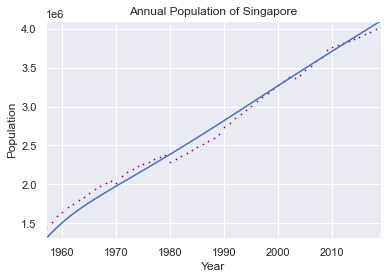

In [19]:
temp = df_age['Total Residents'].values
Y=np.zeros(63)
Y_total=np.zeros(63)
num=''
n=0

for y in temp:         #convert objects to string
    y=str(y)
    for i in y:
        if(i==','):
            i=''
        num=num+i
    Y[n]=num
    num=''
    n=n+1
Y_total=list(map(int,Y))#convert string to int
fig,ax=plt.subplots()
plot(X_whole,Y_total,ax,'Annual Population of Singapore','Population')
ax.plot(X_whole,final_results)
plt.xlabel('Year')

Text(0.5, 0, 'Year')

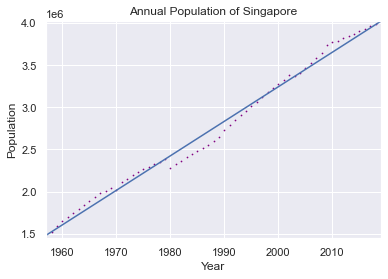

In [20]:
for i in range(57):
    Y_train[i]=Y_total[i]
lr2 = lm.LinearRegression()
lr2.fit(X_train[:, np.newaxis], Y_train)
y_lr = lr2.predict(X_whole[:, np.newaxis])
fig,ax=plt.subplots()
plot(X_whole,Y_total,ax,'Annual Population of Singapore','Population')
ax.plot(X_whole,y_lr)
ax.set_xlabel('Year')

In [21]:
Y_total=np.array(Y_total)
pred=np.zeros(6)
pred_lr=np.zeros(6)
real_of_pred=np.zeros(6)
for i in range(6):
    pred[i]=final_results[57+i]
    pred_lr[i]=y_lr[57+i]
    real_of_pred[i]=Y_total[57+i]
minMax = MinMaxScaler()
normalized_pred = minMax.fit_transform(pred.reshape(-1,1))
normalized_pred_lr = minMax.fit_transform(pred_lr.reshape(-1,1))
normalized_real_of_pred= minMax.fit_transform(real_of_pred.reshape(-1,1))
normalized_Total = minMax.fit_transform(Y_total.reshape(-1,1))
normalized_Overallfit = minMax.fit_transform(final_results.reshape(-1,1))
normalized_Pred_lr =minMax.fit_transform(y_lr.reshape(-1,1))

In [22]:
differences=np.zeros(63)      #the first two are for overall evaluation including both training and testing sets
differences_lr=np.zeros(63)
differences_pred=np.zeros(6)
differences_pred_lr=np.zeros(6)
for i in range(63):
    differences[i]=abs(normalized_Overallfit[i]-normalized_Total[i])
    differences_lr[i]=abs(normalized_Pred_lr[i]-normalized_Total[i])
for i in range(6):
    differences_pred[i]=abs(normalized_pred[i]-normalized_real_of_pred[i])
    differences_pred_lr[i]=abs(normalized_pred_lr[i]-normalized_real_of_pred[i])
MAE=sum(differences)/63
MAE_lr=sum(differences_lr)/63
MAE_pred=sum(differences_pred)/6
MAE_pred_lr=sum(differences_pred_lr)/6
print("The MAE for the optimization method is",MAE)
print("The MAE for linear regression on total population of residents is",MAE_lr)
print("The MAE on test set for the optimization method is",MAE_pred)
print("The MAE on test set for linear regression method is",MAE_pred_lr)

The MAE for the optimization method is 0.019694326468671974
The MAE for linear regression on total population of residents is 0.026647477165638075
The MAE on test set for the optimization method is 0.004135601181689689
The MAE on test set for linear regression method is 0.004390986471131342
